# IBM Developer Skills Network

# Spatial Operations using Pillow

In [ ]:
# All images are in previous lesson

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [2]:
# A function to plot 2 image side by side
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1)
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2)
    plt.title(title_2)
    plt.show()

# Linear Filtering

Filtering involves enhancing an image, for example, removing the noise from an image. Noise can be caused by a bad camera or bad image compression. The same factors that cause noise may lead to blurry images. We can apply filters to sharpen these images. Convolution is a standard way to filter an image. The filter is called the kernel and different kernels perform different tasks. In addition, Convolution is used for many of the most advanced artificial intelligence algorithms. We simply take the dot product of the kernel and an equally-sized portion of the image. We then shift the kernel and repeat.

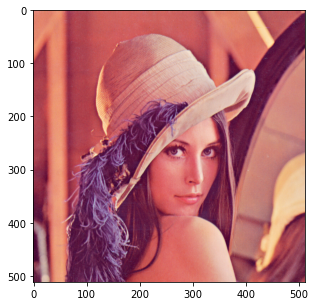

In [3]:
image = Image.open('lenna.png')
plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.show()

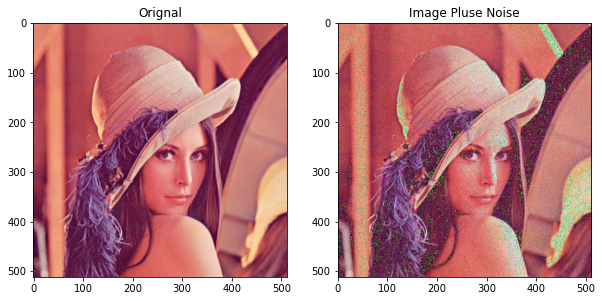

In [4]:
# get number of rows and cols
rows, cols = image.size

# create a random noise - mean 0, std 15
noise = np.random.normal(0, 15, (rows, cols, 3)).astype(np.uint8) 

# add noise to image
noisy_image = image + noise

# image from array
noisy_image = Image.fromarray(noisy_image)

plot_image(image, noisy_image, title_1="Orignal", title_2="Image Pluse Noise")

## Filtering Noise

In [5]:
from PIL import ImageFilter

In [6]:
# Create a kernel which is a 5 by 5 array where each value is 1/36
kernel = np.ones((5, 5)) / 36

# Create a ImageFilter Kernel by providing the kernel size and a flattened kernel
kernel_filter = ImageFilter.Kernel((5, 5), kernel.flatten())

In [7]:
# Filters the images using the kernel
image_filtered = noisy_image.filter(kernel_filter)

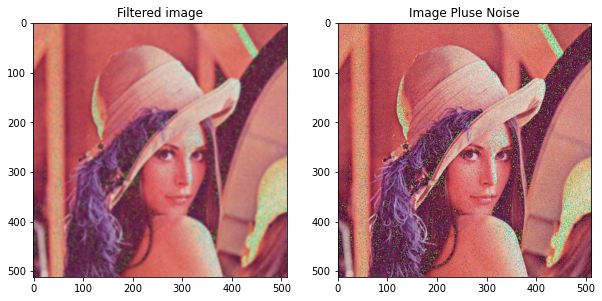

In [8]:
# Plot image before and after filtering- less noise but blurry
plot_image(image_filtered, noisy_image,title_1="Filtered image",title_2="Image Pluse Noise")

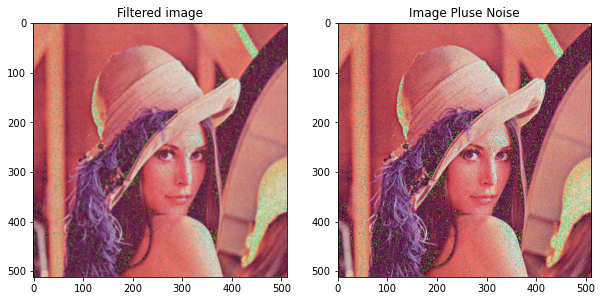

In [9]:
# Smaller filter keeps image sharp but filters less noise
kernel = np.ones((3, 3))/36
kernel_filter = ImageFilter.Kernel((3, 3), kernel.flatten())
image_filtered = noisy_image.filter(kernel_filter)
plot_image(image_filtered, noisy_image,title_1="Filtered image",title_2="Image Pluse Noise")

## Gaussian Blur

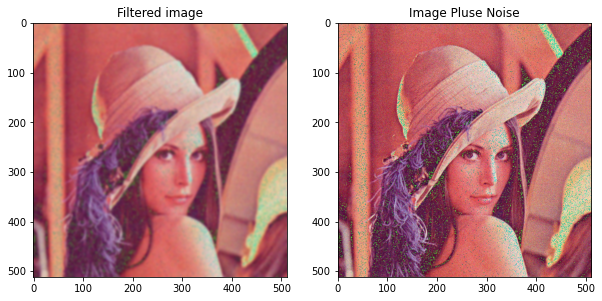

In [10]:
# radius: blur kernel radius, default 2
image_filtered = noisy_image.filter(ImageFilter.GaussianBlur)
plot_image(image_filtered , noisy_image,title_1="Filtered image",title_2="Image Pluse Noise")

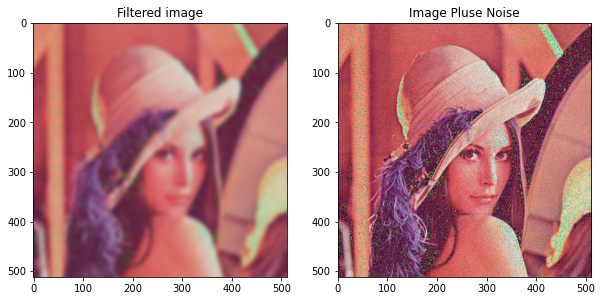

In [11]:
# change to a 4x4 kernel
image_filtered = noisy_image.filter(ImageFilter.GaussianBlur(4))
plot_image(image_filtered , noisy_image,title_1="Filtered image",title_2="Image Pluse Noise")

## Image sharpening

Image Sharpening involves smoothing the image and calculating the derivatives. We can accomplish image sharpening by applying the following Kernel.

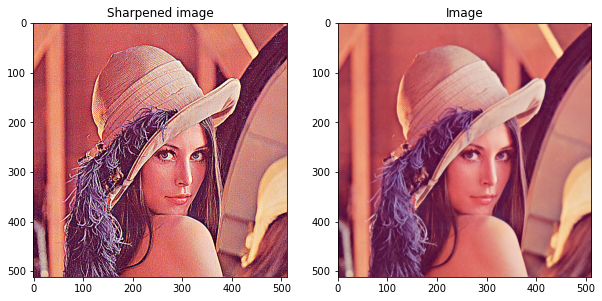

In [12]:
# common kernel for image sharpening
kernel = np.array([[-1,-1,-1],
                   [-1, 9,-1],
                   [-1,-1,-1]])
kernel = ImageFilter.Kernel((3, 3), kernel.flatten())

# apply the filter
sharpened = image.filter(kernel)
plot_image(sharpened , image, title_1="Sharpened image",title_2="Image")

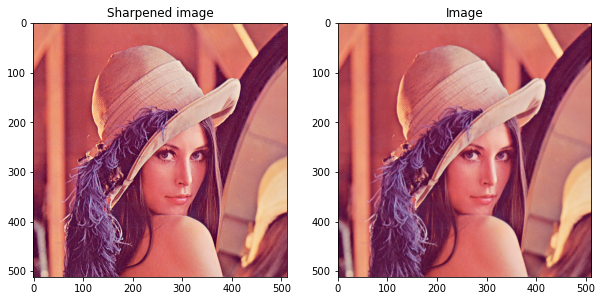

In [13]:
# Using a predefined filter
sharpened = image.filter(ImageFilter.SHARPEN)
plot_image(sharpened , image, title_1="Sharpened image",title_2="Image")

## Edges

Edges are where pixel intensities change. The Gradient of a function outputs the rate of change; we can approximate the gradient of a grayscale image with convolution. Consider the following image:

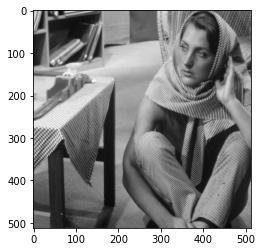

In [14]:
img_gray = Image.open('barbara.png')
plt.imshow(img_gray, cmap='gray')

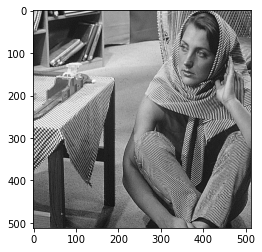

In [15]:
# Enhanced edge
img_gray = img_gray.filter(ImageFilter.EDGE_ENHANCE)
plt.imshow(img_gray, cmap='gray')

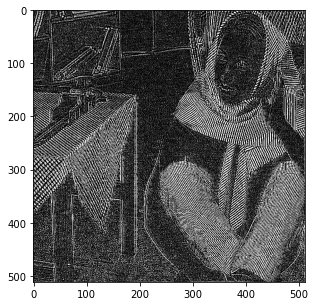

In [16]:
# Using Find_edges filter
img_gray = img_gray.filter(ImageFilter.FIND_EDGES)
plt.figure(figsize=(5,5))
plt.imshow(img_gray ,cmap='gray')

## Median

Median filters find the median of all the pixels under the kernel area and the central element is replaced with this median value.

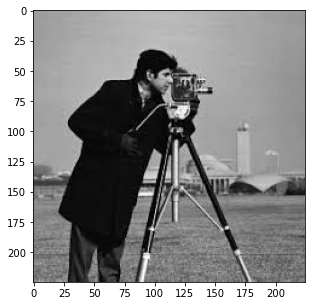

In [17]:
image = Image.open('cameraman.jpeg')
plt.figure(figsize=(5, 5))
plt.imshow(image, cmap= 'gray')

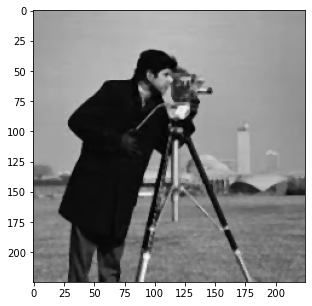

In [18]:
image = image.filter(ImageFilter.MedianFilter)
plt.figure(figsize=(5,5))
plt.imshow(image, cmap='gray')